In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_124627 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125226 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125656 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125157 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_125339 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_115649 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122151(0) (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_122241 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/IMG_20211107_130039 (Custom).jpg
/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/20211109_121859 (Custom).jpg
/kaggle/input/mango-leaf-disease-d

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import pathlib
import PIL

In [3]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import pathlib
import PIL
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

2024-05-10 07:39:50.702737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 07:39:50.702893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 07:39:50.876541: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
data_dir = '/kaggle/input/mango-leaf-disease-dataset'
data_dir = pathlib.Path(data_dir)

In [5]:
class_names = sorted(item.name for item in data_dir.glob('*') if item.is_dir())
print(class_names)


['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4000


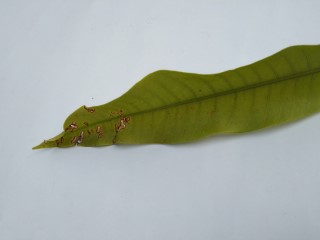

In [7]:
Anthracnose = list(data_dir.glob('Anthracnose/*'))
PIL.Image.open(str(Anthracnose[0]))

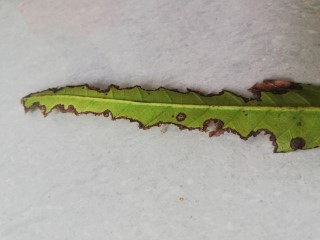

In [8]:
bc = list(data_dir.glob('Bacterial Canker/*'))
PIL.Image.open(str(bc[0]))

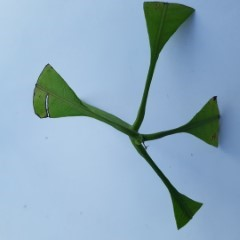

In [9]:
cw = list(data_dir.glob('Cutting Weevil/*'))
PIL.Image.open(str(cw[0]))


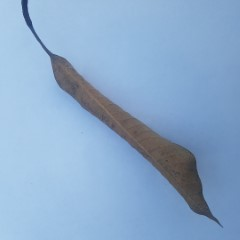

In [10]:
db = list(data_dir.glob('Die Back/*'))
PIL.Image.open(str(db[0]))

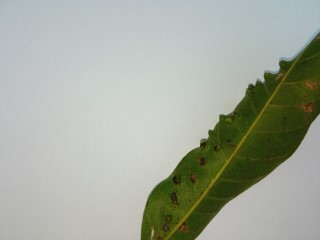

In [11]:
gm = list(data_dir.glob('Gall Midge/*'))
PIL.Image.open(str(gm[0]))

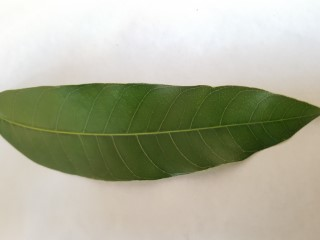

In [12]:
h = list(data_dir.glob('Healthy/*'))
PIL.Image.open(str(h[0]))

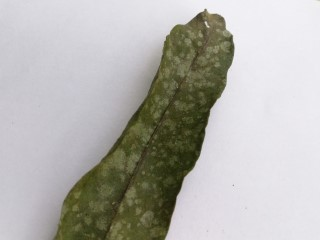

In [13]:
pm = list(data_dir.glob('Powdery Mildew/*'))
PIL.Image.open(str(pm[0]))

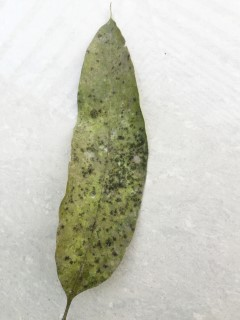

In [14]:
sm = list(data_dir.glob('Sooty Mould/*'))
PIL.Image.open(str(sm[0]))

In [15]:
batch_size = 64
img_height = 240
img_width = 320

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 3600 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 8 classes.
Using 400 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 240, 320, 3)
(64,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print("minimum pixel value:",np.min(first_image), "maximum pixel value:", np.max(first_image))

minimum pixel value: 0.0 maximum pixel value: 0.8780229


In [23]:
class_names = sorted(item.name for item in data_dir.glob('*') if item.is_dir())
print(class_names)

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


In [24]:
images = []
labels = []

for class_name in class_names:
    for image_path in tqdm(list(data_dir.glob(f"{class_name}/*.jpg"))):
        img = PIL.Image.open(image_path)
        img = img.resize((240, 320))  # Resize images if needed
        images.append(np.array(img))
        labels.append(class_names.index(class_name))

100%|██████████| 500/500 [00:02<00:00, 244.91it/s]


In [25]:
images = np.array(images)
labels = np.array(labels)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [27]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [28]:
nb_classifier = GaussianNB()

In [29]:
nb_classifier.fit(X_train_flat, y_train)

GaussianNB()

In [30]:
y_pred = nb_classifier.predict(X_test_flat)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.56


In [32]:
print(classification_report(y_test, y_pred, target_names=class_names))

                  precision    recall  f1-score   support

     Anthracnose       0.64      0.68      0.66        62
Bacterial Canker       0.72      0.76      0.74        45
  Cutting Weevil       0.65      0.86      0.74        51
        Die Back       0.75      0.44      0.55        48
      Gall Midge       0.36      0.21      0.27        57
         Healthy       0.41      0.68      0.51        38
  Powdery Mildew       0.51      0.53      0.52        47
     Sooty Mould       0.43      0.38      0.41        52

        accuracy                           0.56       400
       macro avg       0.56      0.57      0.55       400
    weighted avg       0.56      0.56      0.55       400

